# **Sentiment Analysis on IMDB Movie Reviews**

# Kaggle API Setup and Dataset Download in Google Colab

This guide provides detailed instructions on how to set up the Kaggle API and download datasets directly into a Google Colab notebook. These steps are essential for accessing Kaggle's vast repository of datasets for data science and machine learning projects.

## Prerequisites

Before beginning, ensure you have a Kaggle account. If you do not have one, sign up at [Kaggle](https://www.kaggle.com).


### Step 1: Install Kaggle Library

First, we install the Kaggle library using pip. This library is essential for interacting with Kaggle's API to download datasets and participate in competitions.

```python
!pip install -q kaggle
```

In [2]:
!pip install -q kaggle

Step 2: Upload Kaggle API Key
-----------------------------

To use Kaggle's API, you need an API key, which is a JSON file (`kaggle.json`) obtained from your Kaggle account. To download this file:

1.  Go to your Kaggle account settings.
2.  Scroll to the "API" section and click "Create New API Token".
3.  This will download the `kaggle.json` file to your computer.

Once you have the `kaggle.json` file, you need to upload it to Colab:

In [3]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chauhant08","key":"6960ded4a215f20b204d2b4c278d8e17"}'}

Step 3: Set Up Kaggle API Key
-----------------------------

After uploading the API key, set it up by moving it to the `.kaggle` directory in your home folder. This step ensures that the Kaggle API can access the key for authentication:

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Step 4: Download Dataset
------------------------

With the Kaggle API set up, you can now download datasets. In this example, we'll download the IMDB Dataset of 50K Movie Reviews, a dataset useful for natural language processing and sentiment analysis tasks:

In [6]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

 51% 13.0M/25.7M [00:00<00:00, 136MB/s]
100% 25.7M/25.7M [00:00<00:00, 178MB/s]


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import re

Download `punkt` and `stopwords` models using nltk library

In [8]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
pd.set_option('display.max_colwidth', None)

Step 5: Data Preprocessing
------------------

*   **Reading the Dataset**: Load the dataset into a pandas DataFrame for manipulation.
*   **Exploratory Data Analysis (EDA)**: Analyze the dataset to understand its structure, checking for class imbalance, and identifying any missing values.
*   **Text Preprocessing**: Clean and preprocess the review texts by converting to lowercase, removing special characters, and filtering out stopwords.


In [10]:
df = pd.read_csv("/content/imdb-dataset-of-50k-movie-reviews.zip")

In [11]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [12]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [13]:
df.shape

(50000, 2)

In [14]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [15]:
df['review'] = df['review'].str.lower()

### Step 6: Text Preprocessing

Normalize text data by converting to lowercase, removing special characters, and filtering out stopwords.

In [16]:
stop_words = set(stopwords.words('english'))

In [17]:
def preprocess_text(text):
    text = re.sub(r'\W+', ' ', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text)
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(words)

In [18]:
df['processed_review'] = df['review'].apply(preprocess_text)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_review'], df['sentiment'], test_size=0.3, random_state=42)


In [58]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((35000,), (15000,), (35000,), (15000,))

Step 7.1: Feature Extraction and Model Training
--------------------------

1.   ### Bag of Words (BoW)
> Indented block Transform the preprocessed text into numerical formats using CountVectorizer for model training.

2.   ### Naive Bayes Classifier
> Indented block Train a Naive Bayes classifier using both BoW and TF-IDF features. Evaluate the model based on accuracy and provide a classification report.

In [59]:
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [60]:
classifier = MultinomialNB()
classifier.fit(X_train_bow, y_train)

MultinomialNB()

In [61]:
predictions = classifier.predict(X_test_bow)

In [56]:
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

In [26]:
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


Accuracy: 0.8588

Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.88      0.86      7411
    positive       0.88      0.84      0.86      7589

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



Step 7.2: Feature Extraction and Model Training
--------------------------

1.   ### TF-IDF
> Indented block Transform the preprocessed text into numerical formats using  TfidfVectorizer for model training.

2.   ### Naive Bayes Classifier
> Indented block Train a Naive Bayes classifier using both BoW and TF-IDF features. Evaluate the model based on accuracy and provide a classification report.

In [28]:
vectorizer = TfidfVectorizer()
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)

In [29]:
classifier = MultinomialNB()
classifier.fit(X_train_tf, y_train)

MultinomialNB()

In [30]:
predictions = classifier.predict(X_test_tf)

In [31]:
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

In [32]:
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.8661333333333333

Classification Report:
               precision    recall  f1-score   support

    negative       0.85      0.89      0.87      7411
    positive       0.88      0.85      0.86      7589

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



Step 7.3: Feature Extraction and Model Training
--------------------------

### Neural Network Model
> Indented block Build a neural network model with Keras, incorporating embedding layers for text data. Train the model, and evaluate its performance on the test data.

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

In [36]:
tokenizer

In [37]:
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

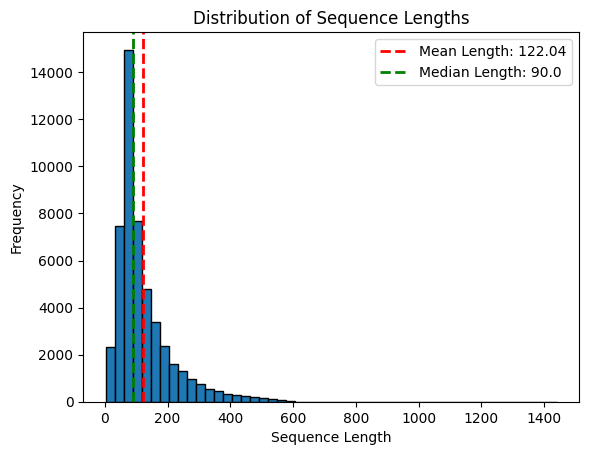

In [38]:
all_sequences = train_sequences + test_sequences
# Calculate the lengths of all sequences
sequence_lengths = [len(seq) for seq in all_sequences]

# Plotting the histogram
plt.hist(sequence_lengths, bins=50, edgecolor='black')
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')

# Calculate and display the mean and median lengths
mean_length = np.mean(sequence_lengths)
median_length = np.median(sequence_lengths)

plt.axvline(mean_length, color='red', linestyle='dashed', linewidth=2, label=f'Mean Length: {mean_length:.2f}')
plt.axvline(median_length, color='green', linestyle='dashed', linewidth=2, label=f'Median Length: {median_length}')

plt.legend()
plt.show()


In [39]:
max_sequence_length = max(len(seq) for seq in train_sequences + test_sequences)
max_sequence_length

1440

In [40]:
max_sequence_length = 130
X_train = pad_sequences(train_sequences, maxlen=max_sequence_length)
X_test = pad_sequences(test_sequences, maxlen=max_sequence_length)

In [49]:
embedding_dim = 512

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Flatten())
# model.add(Dense(512, activation='relu'))  # Increase number of neurons
# model.add(Dropout(0.3))  # Add dropout for regularization
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))  # Add dropout for regularization
model.add(Dense(128, activation='relu'))  # Increase number of neurons
model.add(Dropout(0.4))  # Add dropout for regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [50]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 130, 512)          512000    
                                                                 
 flatten_2 (Flatten)         (None, 66560)             0         
                                                                 
 dense_10 (Dense)            (None, 256)               17039616  
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 64)               

In [52]:
# Train the model
model.fit(X_train, (y_train == 'positive').astype(int),
          epochs=10, batch_size=16, validation_split=0.2)
# , callbacks=[early_stopping])

Epoch 1/10
1750/1750 [==============================] - 32s 18ms/step - loss: 0.4399 - accuracy: 0.7864 - val_loss: 0.3517 - val_accuracy: 0.8450
Epoch 2/10
1750/1750 [==============================] - 19s 11ms/step - loss: 0.2600 - accuracy: 0.8941 - val_loss: 0.4278 - val_accuracy: 0.8273
Epoch 3/10
1750/1750 [==============================] - 21s 12ms/step - loss: 0.1108 - accuracy: 0.9592 - val_loss: 0.6608 - val_accuracy: 0.7997
Epoch 4/10
1750/1750 [==============================] - 18s 10ms/step - loss: 0.0634 - accuracy: 0.9771 - val_loss: 0.8145 - val_accuracy: 0.8074
Epoch 5/10
1750/1750 [==============================] - 17s 10ms/step - loss: 0.0410 - accuracy: 0.9864 - val_loss: 1.0340 - val_accuracy: 0.8149
Epoch 6/10
1750/1750 [==============================] - 17s 10ms/step - loss: 0.0384 - accuracy: 0.9871 - val_loss: 0.9019 - val_accuracy: 0.8024
Epoch 7/10
1750/1750 [==============================] - 17s 10ms/step - loss: 0.0291 - accuracy: 0.9910 - val_loss: 1.1572 -

In [53]:
loss, accuracy = model.evaluate(X_test, (y_test == 'positive').astype(int))
print(f"Test Accuracy: {accuracy*100:.2f}%")

469/469 [==============================] - 2s 5ms/step - loss: 1.2700 - accuracy: 0.8118
Test Accuracy: 81.18%


Conclusion

Below are the test accruacy for all models

1.   BOW & NB : 85.88%
2.   TF-IDF & NB : 86.62%
3.   Neural Net: 81.18%

